In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [3]:
file_dati = os.listdir('../data/22_12/')
temperature = [i for i in file_dati if i.startswith("Temperature")]
all_df = []
for file_temp in temperature:
    all_df.append(pd.read_csv("../data/22_12/" + file_temp, sep=";", skiprows=1, usecols=range(0,3), header= None ))
    all_df[-1].rename(columns={0: 'Sensori', 1: 'Nominale' ,  2: 'Effettivo'}, inplace=True)

#display(all_df)



In [5]:
num_sensori = all_df[0].index.values
sensori = list(all_df[0]['Sensori'])
#d = {temperatura.strip(".csv")[-5:].replace("_",":") : [0 for i in num_sensori] for temperatura in temperature}    
d = {j : [0 for i in num_sensori] for j in range(len(temperature))}    

df_differenze = pd.DataFrame(data=d, index = num_sensori) 
tempi = list(df_differenze)
# for df in all_df:
for i in range(0, len(tempi)):
    df_differenze[tempi[i]] = all_df[i]['Nominale'] - all_df[i]['Effettivo']

#df_differenze.index=sensori
#print(df_differenze)


    

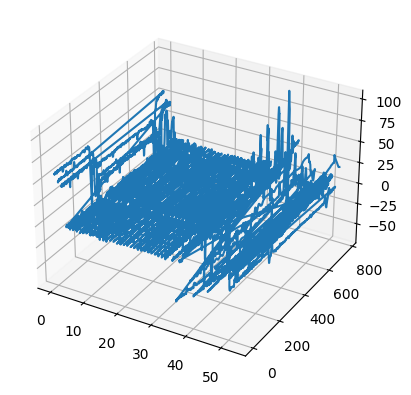

In [6]:
X = np.array([])
Y = np.array([])
Z = np.array([])

for i in range(df_differenze.index.size):
    X = np.concatenate([X, np.full(df_differenze.columns.size, df_differenze.index[i])], 0)

for i in range(df_differenze.index.size):
    Y = np.concatenate([Y, np.array(df_differenze.columns)], 0)

for i in range(df_differenze.index.size):
    Z = np.concatenate([Z, np.array(df_differenze[i:i+1])[0]], 0)
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.plot3D(X, Y, Z)

In [9]:
df_differenze.to_csv('../data/differenze.csv', index=True, sep = '\t')

In [10]:
df_time_serie = df_differenze.transpose()

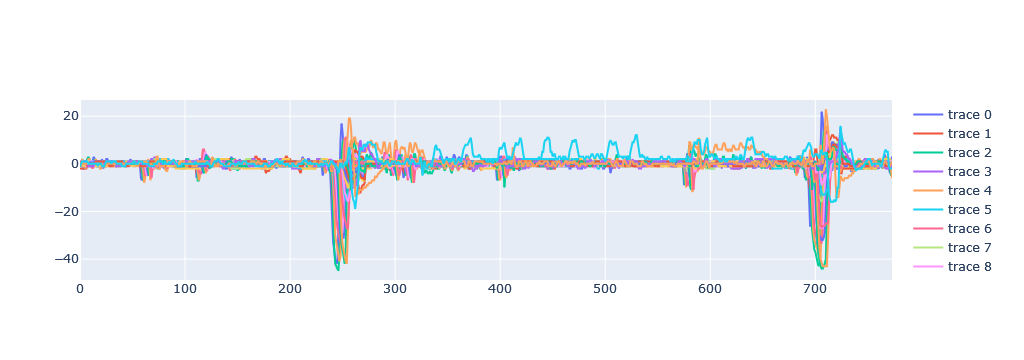

In [11]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)         # initiate notebook for offline plot
X = [i for i in range(774)]
trace = []
for i in range(6,32):
    trace.append(Scatter(x=X, y=df_time_serie[i].to_list()))
    
iplot(trace)               # use plotly.offline.iplot for offline plot


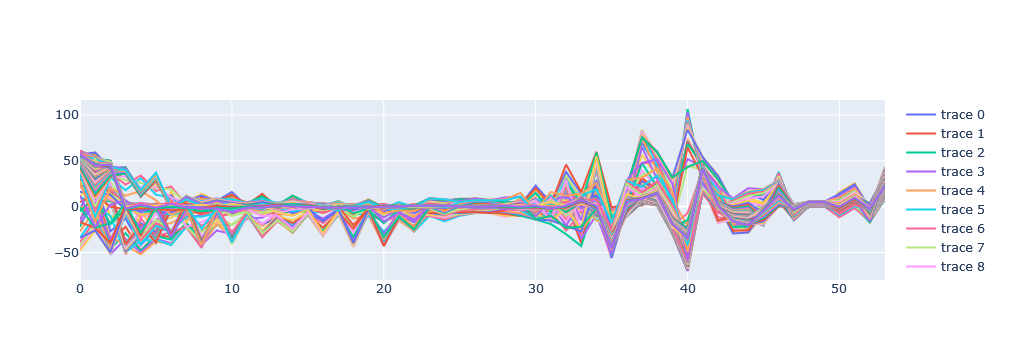

In [12]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)         # initiate notebook for offline plot
X = [i for i in range(54)]
trace = []
for i in range(774):
    trace.append(Scatter(x=X, y=df_differenze[i].to_list()))
    
iplot(trace)               # use plotly.offline.iplot for offline plot

In [13]:
print(df_differenze.iloc[:,250:270])

     250   251   252   253   254   255   256   257   258   259   260   261  \
0   31.0  28.0  26.0  25.0  25.0  25.0  25.0  24.0  26.0  29.0  30.0  31.0   
1    4.0   6.0   6.0   7.0   8.0   9.0  10.0  11.0  13.0  16.0  19.0  20.0   
2   14.0   9.0   6.0   7.0   8.0   8.0   8.0   7.0  10.0  13.0  14.0  15.0   
3  -49.0 -48.0 -48.0 -48.0 -47.0 -46.0 -46.0 -46.0 -44.0 -42.0 -42.0 -42.0   
4  -18.0 -29.0 -32.0 -30.0 -28.0 -27.0 -26.0 -28.0 -27.0 -24.0 -24.0 -23.0   
5  -28.0 -30.0 -31.0 -31.0 -32.0 -33.0 -33.0 -34.0 -34.0 -34.0 -34.0 -35.0   
6   13.0   6.0   1.0  -2.0  -2.0   1.0   4.0   2.0   0.0   0.0   1.0   2.0   
7  -13.0 -12.0 -11.0 -10.0  -8.0  -6.0  -7.0  -8.0  -5.0  -5.0  -7.0  -6.0   
8    9.0  10.0   8.0   4.0   2.0   2.0   6.0   8.0   8.0   6.0   7.0  10.0   
9   -6.0  -4.0  -3.0  -3.0  -1.0   1.0   3.0   3.0   5.0   5.0   4.0   4.0   
10  -4.0   7.0  11.0  10.0   6.0   3.0   5.0   8.0  10.0   9.0   9.0  11.0   
11  -7.0  -5.0  -4.0  -3.0  -2.0  -2.0   0.0   1.0   4.0   5.0  

In [14]:
print(temperature[693])
print(temperature[240])

Temperature_2021_12_22_22_39.csv
Temperature_2021_12_22_15_06.csv


In [15]:
df_effettivo = pd.DataFrame(data=d, index = num_sensori)
for i in range(0, len(tempi)):
    df_effettivo[tempi[i]] = all_df[i]['Effettivo']

In [16]:
    df_differenze_relative = df_differenze.div(df_effettivo)*100
print(df_differenze_relative)

          0          1          2          3          4          5    \
0    9.816972   9.634551   9.816972   9.634551   9.634551   9.816972   
1    8.374384   8.196721   8.552632   8.552632   8.374384   8.374384   
2    7.038123   6.725146   6.881406   6.725146   6.725146   6.881406   
3    0.000000   0.139082   0.278552   0.278552   0.278552   0.278552   
4    0.130039   0.000000   0.130039  -0.259067  -0.259067   0.000000   
5   -0.129702  -0.129702   0.130039   0.000000   0.000000   0.130039   
6    0.119190   0.000000   0.238663  -0.237530  -0.237530  -0.118906   
7   -0.234742  -0.234742  -0.234742  -0.234742  -0.234742  -0.234742   
8   -0.112233   0.000000   0.225225   0.000000  -0.112233  -0.112233   
9    0.000000   0.000000   0.110011   0.110011   0.110011   0.110011   
10   0.000000   0.000000   0.105374   0.105374   0.000000  -0.210084   
11   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
12   0.099602   0.099602   0.000000   0.099602   0.000000  -0.09

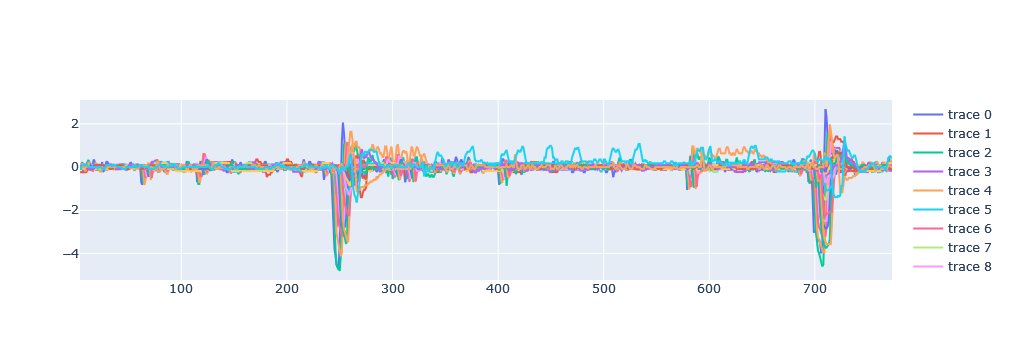

In [17]:
df_time_serie_relative = df_differenze_relative.transpose()
init_notebook_mode(connected=True)         # initiate notebook for offline plot
X = [i for i in range(4,774)]
trace = []
for i in range(6,32): #[0,1,2,35,37,40,46,47,49,53]
    trace.append(Scatter(x=X, y=df_time_serie_relative[i].to_list()))
    
iplot(trace)               # use plotly.offline.iplot for offline plot

In [18]:
print(temperature[0])
print(temperature[773])
print(temperature[240])
print(temperature[693])

Temperature_2021_12_22_10_22.csv
Temperature_2021_12_22_23_59.csv
Temperature_2021_12_22_15_06.csv
Temperature_2021_12_22_22_39.csv


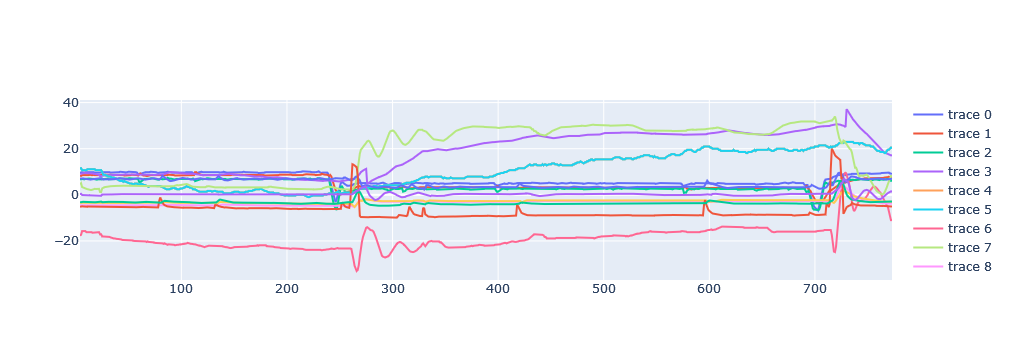

In [19]:
df_time_serie_relative = df_differenze_relative.transpose()
init_notebook_mode(connected=True)         # initiate notebook for offline plot
X = [i for i in range(4,774)]
trace = []
sensori_inaffidabili = [0,1,2,53,49,48,47,46,44,43,41,40,39,36] 
for i in sensori_inaffidabili: #[0,1,2,35,37,40,46,47,49,53]
    trace.append(Scatter(x=X, y=df_time_serie_relative[i].to_list()))
    
iplot(trace)               # use plotly.offline.iplot for offline plot